# Numerical Differentiation

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Numerical differentiation
    - First order methods
        - Forward difference
        - Backward difference
    - Second order methods
        - Central difference
        - Other second order methods
    - Errors
- `numpy` implementation
    - Data differentiation by [`numpy.gradient()`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)

## Numerical differentiation of known function

From the definition of derivative, the forward difference approximation is given by

$$
f'(x) = \dfrac{f(x+\Delta x) - f(x)}{\Delta x}
$$

The backward difference approximation is given by

$$
f'(x) = \dfrac{f(x) - f(x-\Delta x)}{\Delta x}
$$

The central difference approximation is given by

$$
f'(x) = \dfrac{f(x + \Delta x) - f(x-\Delta x)}{2\Delta x}
$$

which is the average of forward and backward difference.

Forward and backward difference are  $\mathcal{O}(\Delta x)$, or first order method. Central difference is $\mathcal{O}(\Delta x^2)$, being a second order method. Note that we also have second order method at the left and right end points:

$$
f'(x) = \dfrac{-3f(x) + 4f(x+\Delta x) - 4f(x+2\Delta x)}{2\Delta x}
$$

$$
f'(x) = \dfrac{3f(x) - 4f(x-\Delta x) + 4f(x-2\Delta x)}{2\Delta x}
$$


### Implementation

**Problem Statement.** Find the derivative of the function 

$$
f(x) = \sin x
$$

using analytic expression, forward difference, backward difference, and central difference. compare their accuracy using a plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# target function
f = lambda x : np.sin(x)
df = lambda x : np.cos(x)  # analytic for comparison
x = np.arange(0, 2*np.pi, 0.1)

In [3]:
def forward_diff(f, x, dx):
    return (f(x + dx) - f(x))/dx

In [4]:
def backward_diff(f, x, dx):
    return (f(x) - f(x - dx))/dx

In [5]:
def central_diff(f, x, dx):
    return (f(x + dx) - f(x - dx))/(2*dx)

In [6]:
dx = 0.1
forward_df = forward_diff(f, x, dx)
backward_df = backward_diff(f, x, dx)
central_df = central_diff(f, x, dx)

In [7]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

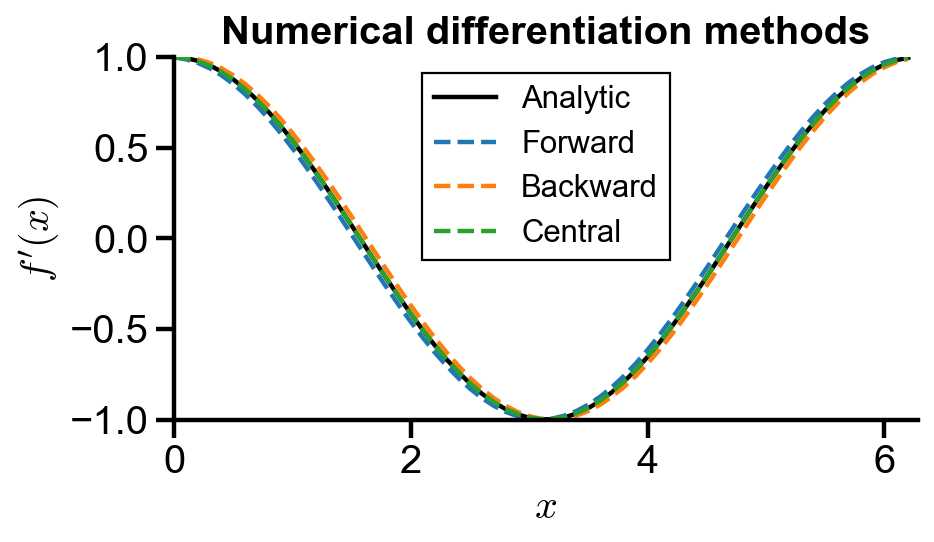

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, df(x), label='Analytic', color='black')
ax.plot(x, forward_df, '--', label='Forward')
ax.plot(x, backward_df, '--', label='Backward')
ax.plot(x, central_df, '--', label='Central')
ax.set_xlabel('$x$')
ax.set_ylabel('$f\'(x)$')
ax.set_title('Numerical differentiation methods')
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1, 1)
ax.legend()

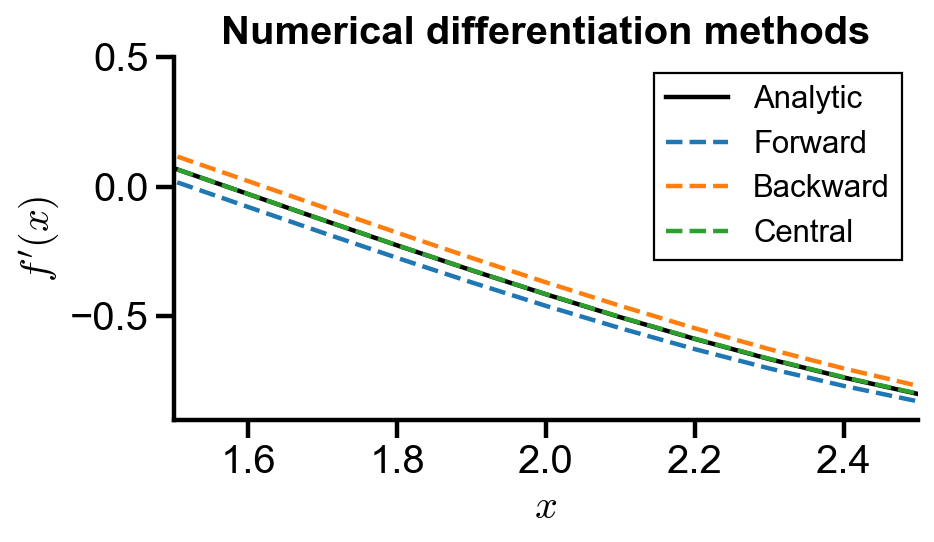

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, df(x), label='Analytic', color='black')
ax.plot(x, forward_df, '--', label='Forward')
ax.plot(x, backward_df, '--', label='Backward')
ax.plot(x, central_df, '--', label='Central')
ax.set_xlabel('$x$')
ax.set_ylabel('$f\'(x)$')
ax.set_title('Numerical differentiation methods')
ax.set_xlim(1.5, 2.5)
ax.set_ylim(-0.9, 0.5)
ax.legend()

### Error and method order

**Problem Statement.** Compare the error of forward difference, backward difference, and central difference with analytic derivative of the function

$$
f(x) = \sin x
$$

Compare the error of the methods using a plot.

In [10]:
# target function
f = lambda x : np.sin(x)
df = lambda x : np.cos(x)  # analytic for comparison
x = np.arange(0, 2*np.pi, 0.1)

In [11]:
dx = np.array([0.1 / 2**i for i in range(5)])
forward_errors = np.zeros(len(dx))
backward_errors = np.zeros(len(dx))
central_errors = np.zeros(len(dx))

In [12]:
for i in range(len(dx)):
    forward_df = forward_diff(f, x, dx[i])
    backward_df = backward_diff(f, x, dx[i])
    central_df = central_diff(f, x, dx[i])
    forward_errors[i] = np.linalg.norm(df(x) - forward_df)
    backward_errors[i] = np.linalg.norm(df(x) - backward_df)
    central_errors[i] = np.linalg.norm(df(x) - central_df)

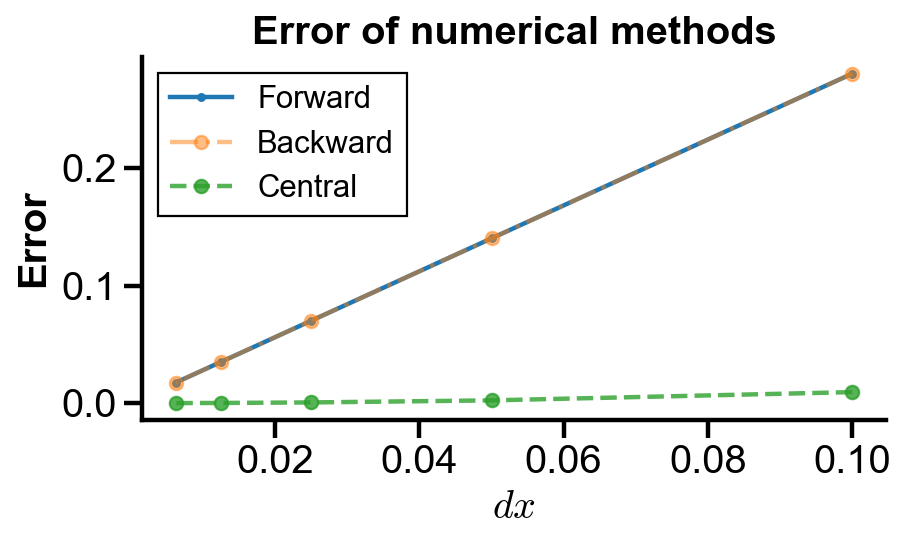

In [13]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(dx, forward_errors, '.-', label='Forward')
ax.plot(dx, backward_errors, 'o-.', label='Backward', alpha=0.5)
ax.plot(dx, central_errors, 'o--', label='Central', alpha=0.8)
ax.set_xlabel('$dx$')
ax.set_ylabel('Error')
ax.set_title('Error of numerical methods')
# ax.set_xlim(1.5, 2.5)
# ax.set_ylim(-0.9, 0.5)
ax.legend()

## Numerical differentiation of data

### Implementation

**Problem Statement.** The Gaussian function has the form

$$
f(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
$$

(a) Generate an equidistant Gaussian dataset of such form in the domain $[0, 5]$ with $\sigma = 1, \mu = 2.5$.

(b) Find the numerical derivative of the data points using second order methods and [`numpy.gradient()`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html). Plot the data and the derivative.

In [14]:
# generate data
gaussian = lambda x, sigma, mu : 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x - mu)**2 / (2*sigma**2))
gaussian_data_x = np.linspace(0, 5, 50)
gaussian_data_y = np.array([gaussian(i, 1, 2.5) for i in gaussian_data_x])

In [15]:
def numerical_diff(data_x, data_y):
    '''
    Numerically differentiate given equidistant data points.
    Central difference is used in middle.
    Second order forward and backward difference used at end points.
    
    :param data_x: x-coordinates of data points
    :param data_y: y-coordinates of data points
    :returns: numerical derivative of data points
    '''
    
    df = np.zeros_like(data_x)
    dx = data_x[1] - data_x[0]  # assume equidistant points
    df[0] = (-3*data_y[0] + 4*data_y[1] - data_y[2])/(2*dx)
    df[-1] = (3*data_y[-1] - 4*data_y[-2] + data_y[-3])/(2*dx)
    df[1:-1] = (data_y[2:] - data_y[0:-2])/(2*dx)
    
    return df

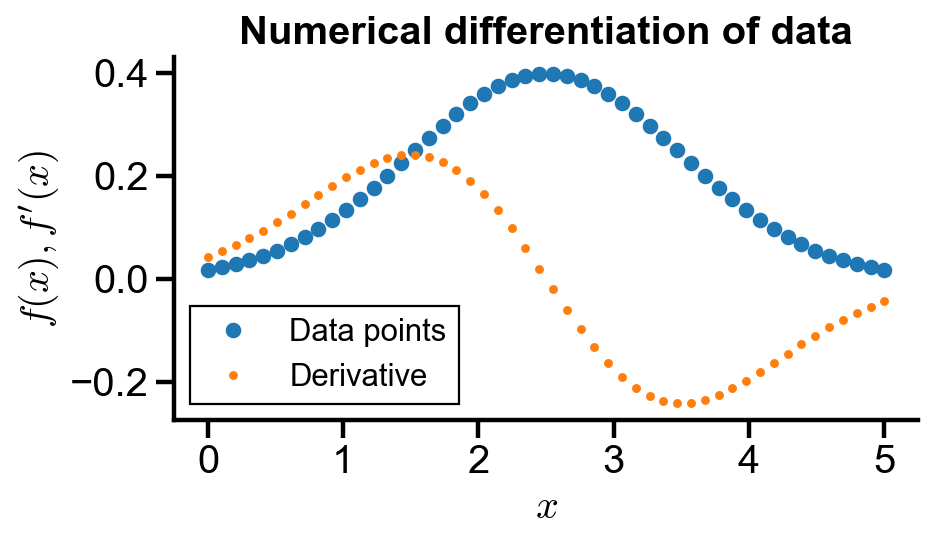

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(gaussian_data_x, gaussian_data_y, 'o', label='Data points')
ax.plot(gaussian_data_x, numerical_diff(gaussian_data_x, gaussian_data_y), '.', label='Derivative')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x), f\'(x)$')
ax.set_title('Numerical differentiation of data')
# ax.set_xlim(1.5, 2.5)
# ax.set_ylim(-0.9, 0.5)
ax.legend()

### Numerical differentiation of data with `numpy`

[`numpy.gradient()`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) has similar implementation as above. It uses central difference in the middle, and forward and backward differences at the end points.

In [17]:
dx = gaussian_data_x[1] - gaussian_data_x[0]
gaussian_df = np.gradient(gaussian_data_y, dx)

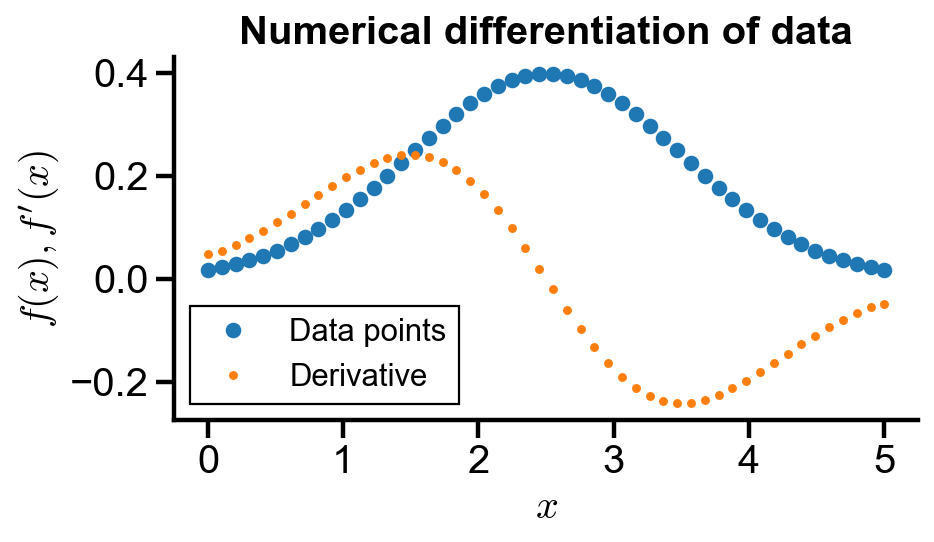

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(gaussian_data_x, gaussian_data_y, 'o', label='Data points')
ax.plot(gaussian_data_x, gaussian_df, '.', label='Derivative')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x), f\'(x)$')
ax.set_title('Numerical differentiation of data')
# ax.set_xlim(1.5, 2.5)
# ax.set_ylim(-0.9, 0.5)
ax.legend()